In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

fla = pd.read_csv('Florida_2.csv')
fla.head()

,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BorrID,LoanStatus,GrossApproval,SBAGuarantee,PctOfGuarantee,...,NaicsCode,NaicsDescription,JobsSupported,DeliveryMethod,subpgmdesc,BankName,BankStreet,BankCity,BankState,BankZip
0,"TARCA, INC..",3754 NW 54TH STREET,MIAMI,FL,33142,308,CHGOFF,1900000,1425000,0.75,...,423120,Motor Vehicle Supplies and New Parts Merchant ...,5,OTH 7A,Guaranty,TotalBank,100 SE 2nd St,MIAMI,FL,33131
1,Around the Clock Fitness,1242 SW Pine Island.,Cape coral,FL,33991,8127,PIF,521800,469620,0.90,...,713990,All Other Amusement and Recreation Industries,20,PLP,Guaranty,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042
2,"Integrated Metering Systems, I","11701 South Belcher Road, Sui",Largo,FL,33773,4025,PIF,40800,34680,0.85,...,335311,"Power, Distribution, and Specialty Transformer...",23,PLP,Guaranty,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901
3,Loving Enterprises Inc and 2 P,7885 Boca Ciega Drive,SAINT PETERSBURG,FL,33706,7228,PIF,332000,249000,0.75,...,453220,"Gift, Novelty, and Souvenir Stores",21,PLP,Guaranty,"PNC Bank, National Association",222 Delaware Ave,WILMINGTON,DE,19801
4,Lawrence J. Roberts & Associat,249 Catalonia Avenue.,Coral gables,FL,33134,1508,EXEMPT,225000,112500,0.50,...,541110,Offices of Lawyers,3,SBA EXPRES,FA$TRK (Small Loan Express),TotalBank,100 SE 2nd St,MIAMI,FL,33131


In [3]:
naics = fla.loc[fla['NaicsCode'] == 722110]

In [4]:
# X used "LoanStatus", "SBAGuarantee",
X = naics[["PctOfGuarantee","DebtCoverage", "Leverage", "PctOfPrinColl","GrossApproval" ]]
y = naics["SBAGuarantee"]
print(X.shape, y.shape)

(176, 5) (176,)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=60)

X_train.head()

,PctOfGuarantee,DebtCoverage,Leverage,PctOfPrinColl,GrossApproval
4672,0.50,2.25,4.00,1.00,103000
11583,0.90,2.25,4.00,1.00,397500
2945,0.50,2.25,4.00,1.00,50000
909,0.50,2.25,2.75,0.30,20000
9513,0.85,2.25,4.00,0.03,122000


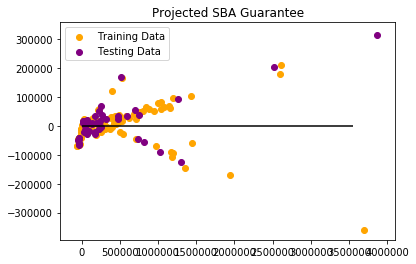

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="orange", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="purple", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Projected SBA Guarantee")
plt.show()

In [7]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [8]:
sum(model.predict(X_test) - y_test)

545387.60315644846

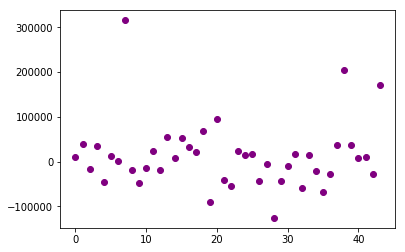

In [9]:
plt.scatter(range(0, len(y_test)), model.predict(X_test) - y_test, c="purple", label="Testing Data")
plt.show()

In [10]:
# Overall Score for the model
model.score(X, y)

0.98804967975498192

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 4166675633.897866
R-squared (R2 ): 0.9880496797549819


In [12]:
one_naics = fla[fla['NaicsCode'] == 722110]

In [13]:
one_naics.groupby('NaicsCode')['COAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
NaicsCode,,,,,,,,
722110,176.0,17414.232955,110588.11847,0.0,0.0,0.0,0.0,1078322.0


In [54]:
one_naics.groupby('NaicsCode')['GrossApproval'].sum()

NaicsCode
722110    89724300
Name: GrossApproval, dtype: int64

In [62]:
one_naics[['BorrName', 'GrossApproval', 'SBAGuarantee', 'PrinBalanceCollected', 'COAmount']].head(10)

,BorrName,GrossApproval,SBAGuarantee,PrinBalanceCollected,COAmount
13,Flash Back Diner,350000,175000,157500.0,0
59,"Nowhere Fast, Inc.",312000,234000,201663.0,110337
89,Tubby's BBQ LLC,10000,5000,5167.0,4833
108,LARIOS CORPORATION AND SUNSET,1563200,1172400,743911.0,819289
166,"TREASURE COAST CORRAL, LLC",1590000,1431000,511678.0,1078322
178,"E.K. HILL & ASSOCIATES, INC",310000,279000,93892.0,216108
274,MARKET HOLDINGS OF TARPON/HOLI,50000,45000,8328.0,41672
325,"JTJL GIFF 6, LLC",595200,446400,72974.0,522226
393,"Dixie Coffee, LLC",540000,405000,540000.0,0
406,"Gateway Donuts, LLC",510000,382500,510000.0,0
